In [1]:
#import library and datasets and models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
#read data 
df = pd.read_csv("/kaggle/input/phones-price-classification/mobile.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# select data to input and target
x = df.drop(columns=['price_range'],axis=1)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [6]:
y = df.price_range
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [7]:
# select data to x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [8]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
934,553,0,0.5,1,2,1,23,0.5,119,3,3,993,1517,2981,7,3,14,1,0,0
212,1049,1,2.2,0,9,0,63,0.5,135,5,17,199,1077,1022,11,3,13,0,0,0
1194,1299,0,2.8,1,2,0,60,0.8,187,8,6,1333,1838,1412,13,1,20,0,1,1
936,805,0,0.8,0,1,0,34,0.6,88,6,2,1262,1538,3647,18,11,9,1,0,1
1637,1695,1,0.5,1,2,1,47,0.5,189,5,13,308,1208,1629,8,6,11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,659,0,2.7,0,6,1,6,0.5,110,3,7,1054,1929,2044,15,5,2,1,0,1
1663,1416,1,1.8,1,0,0,20,0.1,93,4,0,1175,1578,3872,10,2,7,0,0,1
250,893,0,2.5,1,0,0,55,0.6,183,2,1,417,946,2986,7,1,6,0,1,1
1731,1066,0,3.0,1,6,1,5,0.5,167,5,7,53,1504,1044,8,7,11,1,0,0


In [9]:
y_train

934     2
212     0
1194    1
936     3
1637    1
       ..
283     1
1663    3
250     2
1731    0
459     0
Name: price_range, Length: 1600, dtype: int64

In [10]:
# create model ( RandomForestClassifier) and train model
model = RandomForestClassifier(n_estimators=1000) # the number of decision trees 
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [11]:
model.score(x_train, y_train)

1.0

In [12]:
model.score(x_test, y_test)

0.8625

In [13]:
#y_pred = predict x_test
y_pred = model.predict(x_test)

In [14]:
# print mean_squared_error from model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.1375


In [15]:
#confusion_matrix to know Accuracy of model
cm = confusion_matrix(y_test, y_pred)
cm

array([[98,  8,  0,  0],
       [10, 75, 12,  0],
       [ 0, 12, 80,  6],
       [ 0,  0,  7, 92]])

Text(95.72222222222221, 0.5, 'Truth')

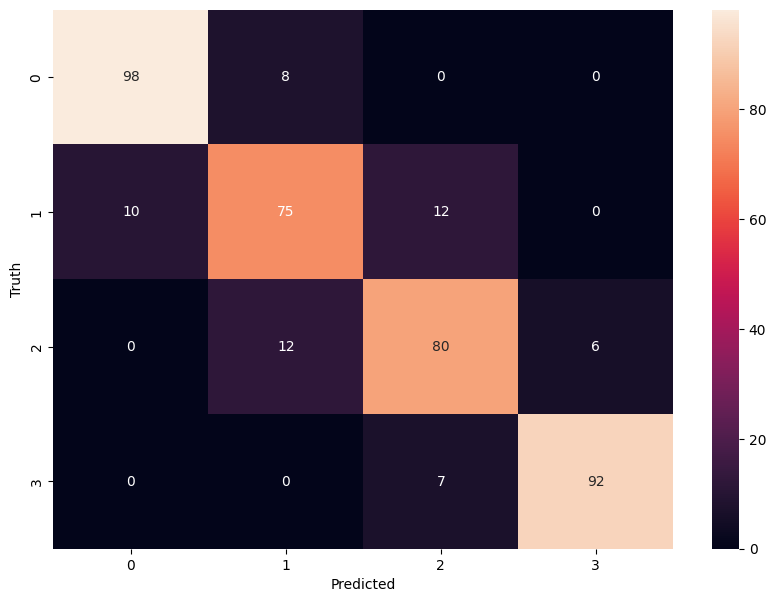

In [16]:
# visualizations confusion_matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')